In [1]:
import pyodbc # Need to create a connection to my database with this.

In [2]:
import pandas as pd # Handle my data

In [3]:
import matplotlib.pyplot as plt

In [4]:
sqlCnxn = pyodbc.connect(
    'DRIVER={ODBC Driver 13 for SQL Server};'
    'SERVER=localhost;'
    'DATABASE=AdventureWorks2017;'
    'Trusted_Connection=yes;'
)

In [5]:
salesData = pd.read_sql( # Extracted the year in the query, not sure how to do it in pandas.
    """
    SELECT 
        YEAR(Sales.SalesOrderHeader.OrderDate) AS OrderYear 
        , Person.CountryRegion.Name AS Country
        , Sales.SalesOrderHeader.TotalDue AS LnTotal
    FROM
        Sales.SalesOrderHeader INNER JOIN Sales.SalesTerritory
            ON Sales.SalesOrderHeader.TerritoryID = Sales.SalesTerritory.TerritoryID 
        INNER JOIN Person.CountryRegion 
            ON Sales.SalesTerritory.CountryRegionCode = Person.CountryRegion.CountryRegionCode
    """, sqlCnxn
)

In [6]:
print(salesData.head(n=3)) # Works? Yes.

   OrderYear        Country     LnTotal
0       2011  United States  23153.2339
1       2011  United States   1457.3288
2       2011         Canada  36865.8012


In [7]:
print(salesData.shape) # lot of rows

(31465, 3)


In [8]:
SalesGrpd = salesData.groupby(['OrderYear', 'Country'])['LnTotal'].sum() # Grouped by year and Country, 
                                                                         # Sum() passed to LineTotal

In [9]:
print(SalesGrpd.head()) # Works

OrderYear  Country       
2011       Australia         1.693033e+06
           Canada            2.106906e+06
           France            2.362686e+05
           Germany           2.727809e+05
           United Kingdom    4.009919e+05
Name: LnTotal, dtype: float64


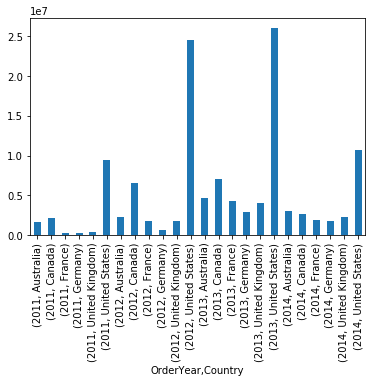

In [10]:
SalesGrpd.plot(kind='bar') # Bar chart for comparison, not the best plot I've done but it works
plt.savefig('C:/Users/river/OneDrive/Desktop/SalesByCountry_rpt1') # Not a great pic, how to fix? Something to look into.
plt.show()